In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [3]:
X, y = load_diabetes(return_X_y=True)


In [4]:
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


# With Simple Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print(r2score)
print(rmse)

0.4772897164322616
53.120156070942706


# With Ridge Regularization

In [12]:
ridge_alpha = 70
degree = 2
with_bias = False

model = Pipeline([
    ('poly_feats', PolynomialFeatures(degree = degree, include_bias = with_bias )),
    ('standard_scaling', StandardScaler()),
    ('ridge', Ridge(alpha=ridge_alpha))
    #('ridge', RidgeCV(alphas=[0.1, 1, 10, 100]))
])

model.fit(X_train, y_train)

r_y_pred = model.predict(X_test)

r_r2score = r2_score(y_test, r_y_pred)
r_rmse = np.sqrt(mean_squared_error(y_test, r_y_pred))

print(f"r_r2score : {r_r2score} ")
print(f"r_rmse : {r_rmse} ")

r_r2score : 0.4901258549970102 
r_rmse : 52.46386903912621 


In [8]:
#print(y_train)

[208. 261. 179. 258. 262.  51. 237.  71. 139. 268.  69. 317. 249. 154.
 192. 116.  81. 122. 259. 191. 292.  55. 107. 210.  91. 253.  85. 252.
  59.  78. 200.  78. 245. 175.  42. 127.  53.  94. 104. 199. 265. 281.
 248. 257. 215. 303. 170.  59. 277. 209. 138. 198. 124.  96. 288. 225.
 265. 101.  55. 198.  51. 252.  64. 220. 131. 212. 142. 103. 155. 121.
  86. 111.  65. 131.  51. 128. 141.  48. 109. 178.  88.  84. 216. 150.
  60.  96. 190.  74. 279. 182. 160. 245. 276. 174. 180. 150. 196. 138.
  97. 246. 321. 308. 109.  69. 182. 258. 161. 178. 214.  45. 150. 160.
  55. 197. 185. 268. 310. 123.  68.  72. 185. 144. 147. 168. 178. 246.
 151. 127.  83. 332. 152. 109.  90.  66. 214.  85. 129.  89. 259. 229.
 200.  77.  54.  31. 109. 206. 144. 118.  83. 242. 259.  72. 163. 181.
 141.  71. 137. 195. 179. 102. 131.  47. 235.  77. 198.  93. 162. 225.
 275. 183. 306.  81.  55. 146. 196. 230. 310.  40. 135. 346.  43. 128.
  77. 235.  49.  74.  92.  84. 263. 144. 142. 341. 115. 158. 273.  85.
  88. 

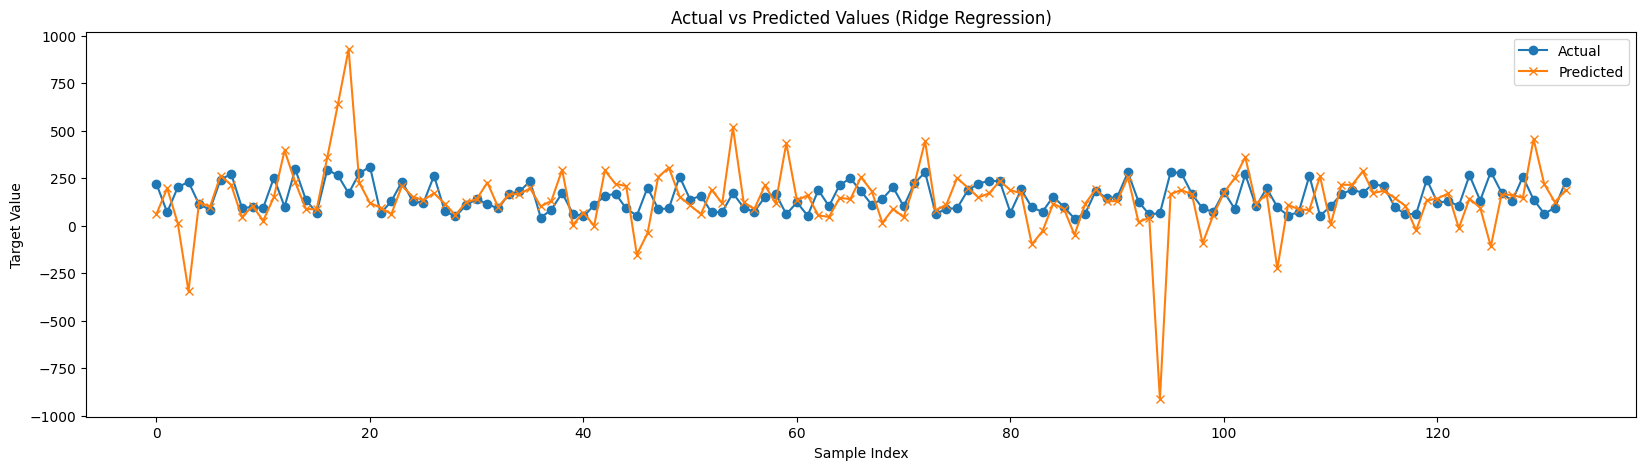

In [9]:
plt.figure(figsize=(20,5))
plt.plot(y_test.values if hasattr(y_test, "values") else y_test, label="Actual", marker='o')
plt.plot(r_y_pred, label="Predicted", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values (Ridge Regression)")
plt.legend()
plt.show()

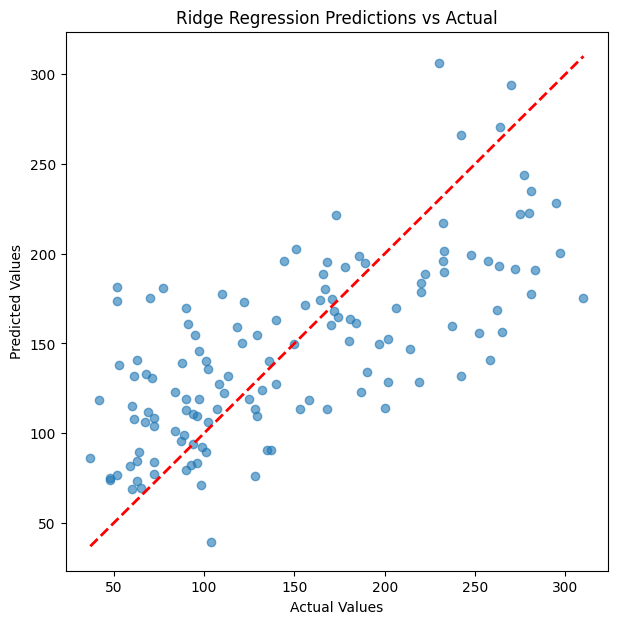

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, r_y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression Predictions vs Actual")
plt.show()


# Polynomial Features With Ridge Regularization inside SGD Rgressor for large dataset

In [49]:
# we have to play with combination of ridge_alpha & degree to create best hyperparameters
ridge_alpha = 0.2
degree = 2
with_bias = True

model = Pipeline([
    ('poly_feats', PolynomialFeatures(degree = degree, include_bias = with_bias )),
    ('standard_scaling', StandardScaler()),
    ("sgd", SGDRegressor(
        penalty="l2",       # Ridge-like regularization
        alpha = ridge_alpha,        # Regularization strength
        max_iter=1000,      # more iterations for convergence
        tol=1e-3, # tolerance for stopping criterion
        random_state=42
    ))
    #('ridge', RidgeCV(alphas=[0.1, 1, 10, 100]))
])

model.fit(X_train, y_train)

r_y_pred = model.predict(X_test)

r_r2score = r2_score(y_test, r_y_pred)
r_rmse = np.sqrt(mean_squared_error(y_test, r_y_pred))

print(f"r_r2score : {r_r2score} ")
print(f"r_rmse : {r_rmse} ")

r_r2score : 0.4920565987532276 
r_rmse : 52.36444218693812 


# SGD VS RIDGE

**SGDRegressor with Polynomial Features**

1. SGDRegressor uses stochastic gradient descent to optimize a linear model, which can include polynomial features.
2. It is efficient for large-scale datasets with many samples.
3. Regularization can be applied (L2, L1, or Elastic Net), but hyperparameter tuning (e.g., learning rate, number of iterations) is critical.
4. SGD may converge slower or be more sensitive to parameter settings and scaling of features.
5. Often used for online or incremental learning scenarios or when computation speed and memory efficiency are priorities.

**Ridge Regression with Polynomial Features**

1. Ridge regression explicitly adds L2 regularization to the least squares cost function to prevent overfitting on polynomial features.
2. It usually provides more stable and interpretable solutions for polynomial regression tasks.
3. Ridge tends to achieve better and more consistent generalization performance because the solution minimizes a convex problem in a closed form or via efficient solvers.
4. Better suited for small to medium datasets where full batch optimization is feasible.
5. Often preferred when control over regularization strength and model interpretability is important.